In [29]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [30]:
sns.__version__

'0.9.0'

In [31]:
# import files and upload them as dataframe
world_happiness_2016 = pd.read_csv("Input Data/world_happiness_2016.csv")
world_happiness_2015 = pd.read_csv("Input Data/world_happiness_2015.csv")
suicide_rates = pd.read_csv("Input Data/suicide_rates_overview1985-2016.csv")

In [32]:
suicide_rates.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [33]:
# see if there are any null values and data types
suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [34]:
# checking info on numerical data types
suicide_rates.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [35]:
# filter out suicide rates to only include years that overlap with world happines report
suicide_rates_2015 = suicide_rates.loc[suicide_rates["year"] == 2015]
suicide_rates_2016 = suicide_rates.loc[suicide_rates["year"] == 2016]

In [36]:
world_happiness_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [37]:
world_happiness_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [38]:
# add year column to dataframe, so we can merge the two data sets 
world_happiness_2015["year"] = 2015
world_happiness_2016["year"] = 2016

In [39]:
suicide_rates_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 576 to 27555
Data columns (total 12 columns):
country               744 non-null object
year                  744 non-null int64
sex                   744 non-null object
age                   744 non-null object
suicides_no           744 non-null int64
population            744 non-null int64
suicides/100k pop     744 non-null float64
country-year          744 non-null object
HDI for year          0 non-null float64
 gdp_for_year ($)     744 non-null object
gdp_per_capita ($)    744 non-null int64
generation            744 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 75.6+ KB


In [40]:
suicide_rates_2015.rename(columns={'country':'Country'}, inplace=True)
suicide_rates_2016.rename(columns={'country':'Country'}, inplace=True)

C:\Users\Trisarah\Anaconda3\envs\dsi\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [41]:
len(world_happiness_2015['Country'].unique())

158

In [42]:
data_2015 = pd.merge(world_happiness_2015, suicide_rates_2015, on="Country",how="right")
data_2016 = pd.merge(world_happiness_2016, suicide_rates_2016, on="Country",how="right")

In [43]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 743
Data columns (total 24 columns):
Country                          744 non-null object
Region                           636 non-null object
Happiness Rank                   636 non-null float64
Happiness Score                  636 non-null float64
Standard Error                   636 non-null float64
Economy (GDP per Capita)         636 non-null float64
Family                           636 non-null float64
Health (Life Expectancy)         636 non-null float64
Freedom                          636 non-null float64
Trust (Government Corruption)    636 non-null float64
Generosity                       636 non-null float64
Dystopia Residual                636 non-null float64
year_x                           636 non-null float64
year_y                           744 non-null int64
sex                              744 non-null object
age                              744 non-null object
suicides_no                      744 

In [44]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 25 columns):
Country                          160 non-null object
Region                           150 non-null object
Happiness Rank                   150 non-null float64
Happiness Score                  150 non-null float64
Lower Confidence Interval        150 non-null float64
Upper Confidence Interval        150 non-null float64
Economy (GDP per Capita)         150 non-null float64
Family                           150 non-null float64
Health (Life Expectancy)         150 non-null float64
Freedom                          150 non-null float64
Trust (Government Corruption)    150 non-null float64
Generosity                       150 non-null float64
Dystopia Residual                150 non-null float64
year_x                           150 non-null float64
year_y                           160 non-null int64
sex                              160 non-null object
age                              160

In [45]:
# drop hdi column
data_2015 = data_2015.drop(columns=["HDI for year"])
data_2015 = data_2015.drop(columns=["year_x"])
data_2016 = data_2016.drop(columns=["HDI for year"])
data_2016 = data_2016.drop(columns=["year_x"])

In [46]:
# drop null value
data_2015.dropna(inplace=True)
data_2016.dropna(inplace=True)

In [47]:
data_2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year_y,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,25-34 years,8,25029,31.96,Iceland2016,"20,304,098,101",64708,Millenials
1,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,55-74 years,10,33247,30.08,Iceland2016,"20,304,098,101",64708,Boomers
2,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,35-54 years,11,44024,24.99,Iceland2016,"20,304,098,101",64708,Generation X
3,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,15-24 years,6,24099,24.90,Iceland2016,"20,304,098,101",64708,Millenials
4,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,75+ years,1,8723,11.46,Iceland2016,"20,304,098,101",64708,Silent
5,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,25-34 years,2,23233,8.61,Iceland2016,"20,304,098,101",64708,Millenials
6,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,55-74 years,2,32963,6.07,Iceland2016,"20,304,098,101",64708,Boomers
7,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,15-24 years,0,22971,0.00,Iceland2016,"20,304,098,101",64708,Millenials
8,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,35-54 years,0,43216,0.00,Iceland2016,"20,304,098,101",64708,Generation X
9,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,75+ years,0,11268,0.00,Iceland2016,"20,304,098,101",64708,Silent


In [48]:
df = pd.concat([data_2015, data_2016],sort=False)

In [21]:
df.sort_values(by=["Region","Country"])

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year_y,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,Lower Confidence Interval,Upper Confidence Interval
84,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,male,35-54 years,944,3149299,29.97,Australia2015,"1,349,034,029,453",60656,Generation X,NaN,NaN
85,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,male,75+ years,181,673787,26.86,Australia2015,"1,349,034,029,453",60656,Silent,NaN,NaN
86,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,male,25-34 years,423,1762265,24.00,Australia2015,"1,349,034,029,453",60656,Millenials,NaN,NaN
87,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,male,55-74 years,457,2337430,19.55,Australia2015,"1,349,034,029,453",60656,Boomers,NaN,NaN
88,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,male,15-24 years,281,1608990,17.46,Australia2015,"1,349,034,029,453",60656,Millenials,NaN,NaN
89,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,female,35-54 years,294,3203643,9.18,Australia2015,"1,349,034,029,453",60656,Generation X,NaN,NaN
90,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,female,15-24 years,110,1526305,7.21,Australia2015,"1,349,034,029,453",60656,Millenials,NaN,NaN
91,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,female,25-34 years,119,1747715,6.81,Australia2015,"1,349,034,029,453",60656,Millenials,NaN,NaN
92,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,female,55-74 years,152,2411343,6.30,Australia2015,"1,349,034,029,453",60656,Boomers,NaN,NaN
93,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,female,75+ years,52,884347,5.88,Australia2015,"1,349,034,029,453",60656,Silent,NaN,NaN


In [50]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 0 to 149
Data columns (total 24 columns):
Country                          786 non-null object
Region                           786 non-null object
Happiness Rank                   786 non-null float64
Happiness Score                  786 non-null float64
Standard Error                   636 non-null float64
Economy (GDP per Capita)         786 non-null float64
Family                           786 non-null float64
Health (Life Expectancy)         786 non-null float64
Freedom                          786 non-null float64
Trust (Government Corruption)    786 non-null float64
Generosity                       786 non-null float64
Dystopia Residual                786 non-null float64
year_y                           786 non-null int64
sex                              786 non-null object
age                              786 non-null object
suicides_no                      786 non-null int64
population                       786 no

In [22]:
df.loc[(df["Country"] == "Australia")]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year_y,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,Lower Confidence Interval,Upper Confidence Interval
84,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,male,35-54 years,944,3149299,29.97,Australia2015,"1,349,034,029,453",60656,Generation X,NaN,NaN
85,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,male,75+ years,181,673787,26.86,Australia2015,"1,349,034,029,453",60656,Silent,NaN,NaN
86,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,male,25-34 years,423,1762265,24.00,Australia2015,"1,349,034,029,453",60656,Millenials,NaN,NaN
87,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,male,55-74 years,457,2337430,19.55,Australia2015,"1,349,034,029,453",60656,Boomers,NaN,NaN
88,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,male,15-24 years,281,1608990,17.46,Australia2015,"1,349,034,029,453",60656,Millenials,NaN,NaN
89,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,female,35-54 years,294,3203643,9.18,Australia2015,"1,349,034,029,453",60656,Generation X,NaN,NaN
90,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,female,15-24 years,110,1526305,7.21,Australia2015,"1,349,034,029,453",60656,Millenials,NaN,NaN
91,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,female,25-34 years,119,1747715,6.81,Australia2015,"1,349,034,029,453",60656,Millenials,NaN,NaN
92,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,female,55-74 years,152,2411343,6.30,Australia2015,"1,349,034,029,453",60656,Boomers,NaN,NaN
93,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,female,75+ years,52,884347,5.88,Australia2015,"1,349,034,029,453",60656,Silent,NaN,NaN


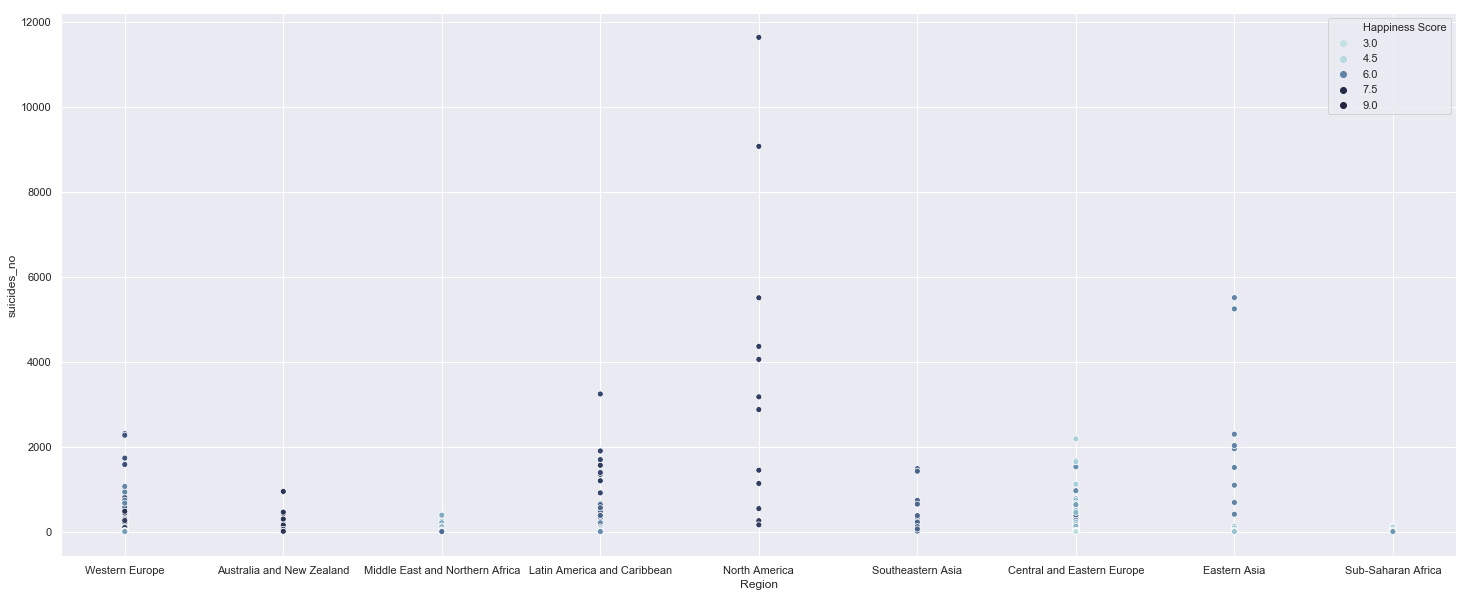

In [99]:
sns.set()

plt.figure(figsize=(25, 10))


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(x="Region", 
                y="suicides_no",
                palette=cmap, 
                hue="Happiness Score",
                sizes=(20,100),
                data=df)

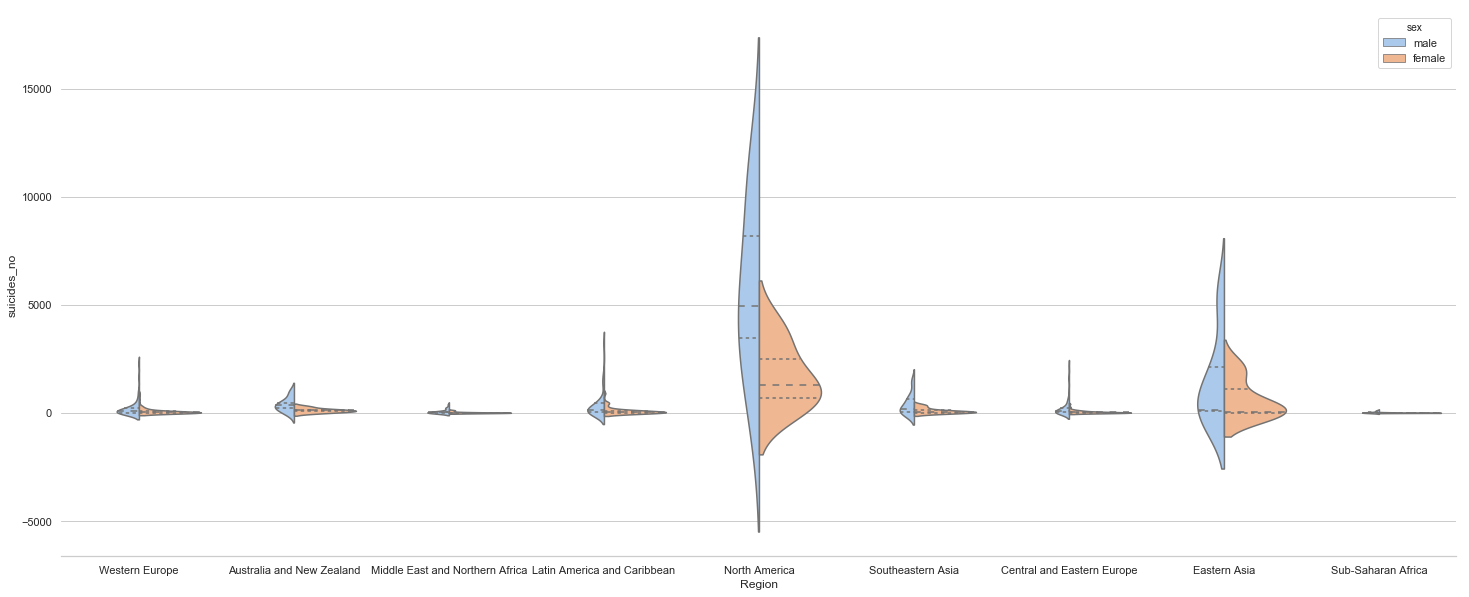

In [115]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
plt.figure(figsize=(25,10))

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="Region", 
               y="suicides_no", 
               hue="sex",
               split=True, 
               inner="quart",
               data=df)
sns.despine(left=True)

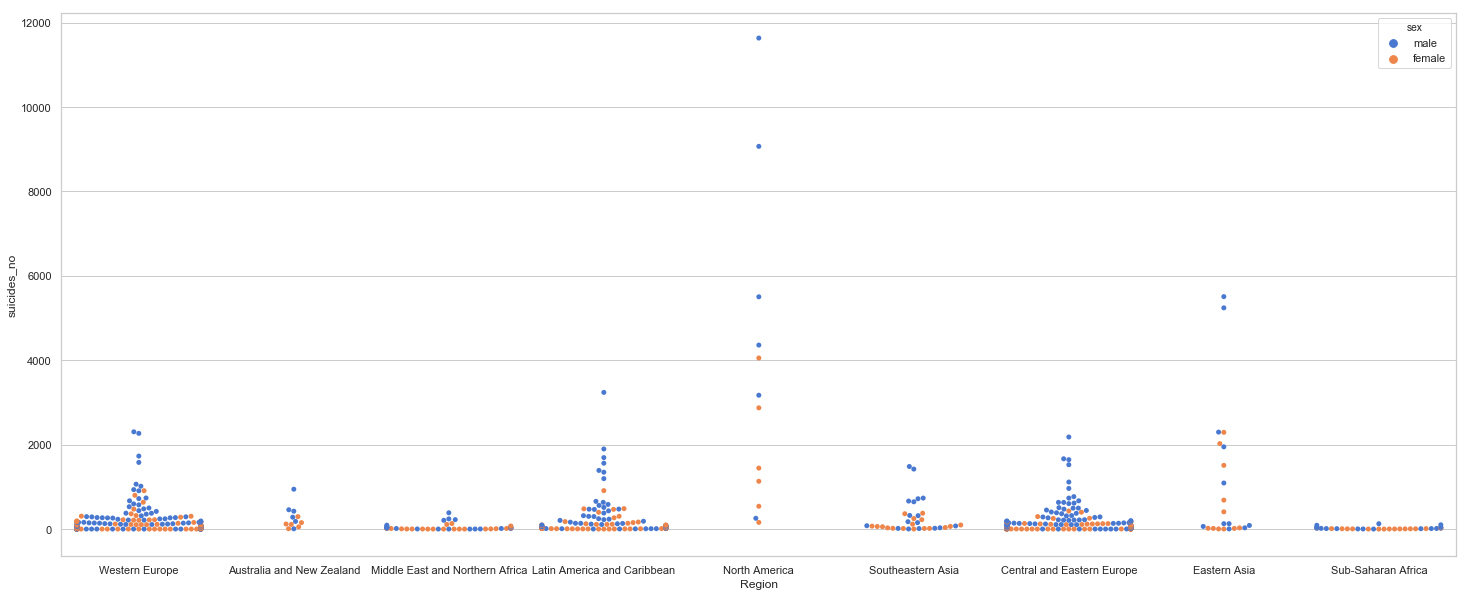

In [113]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(25, 10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="Region", 
              y="suicides_no", 
              hue="sex",
              palette="muted", 
              data=df)

<Figure size 1152x720 with 0 Axes>

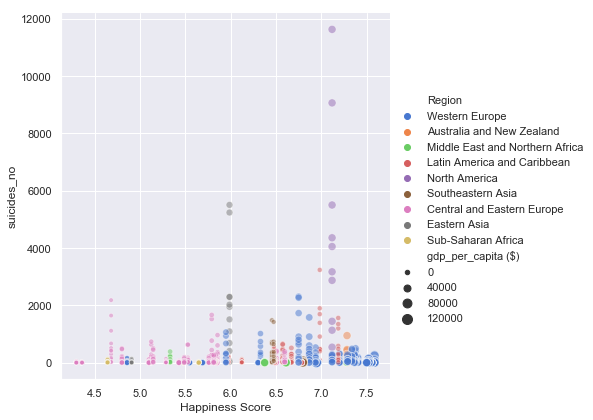

In [84]:
sns.set()
plt.figure(figsize=(16,10))

sns.relplot(x="Happiness Score", y="suicides_no", hue="Region", size="gdp_per_capita ($)",
            sizes=(20, 100), alpha=.5, palette="muted",
            height=6, data=df)

# g.add_legend(title="Meal")
# g.set_axis_labels("Total bill ($)", "")
# g.set(xlim=(0, 60), yticklabels=["Thursday", "Friday", "Saturday", "Sunday"])
# g.despine(trim=True)
# g.fig.set_size_inches(6.5, 3.5)
# g.ax.set_xticks([5, 15, 25, 35, 45, 55], minor=True);
# plt.setp(g.ax.get_yticklabels(), rotation=30);

<Figure size 7200x7200 with 0 Axes>

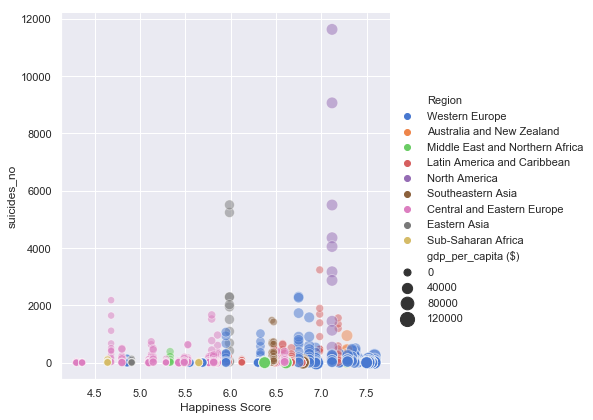

In [73]:
plt.figure(figsize=(100, 100))

sns.relplot(x="Happiness Score", 
            y="suicides_no", 
            hue="Region", 
            size="gdp_per_capita ($)",
            sizes=(50, 200), 
            alpha=.5, 
            palette="muted",
            height=6, 
            data=df)

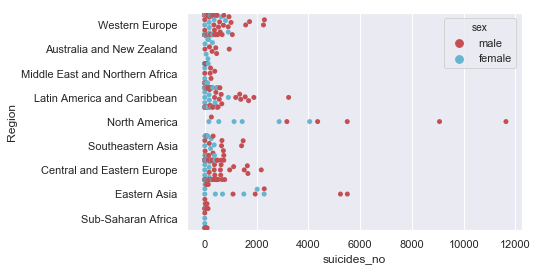

In [62]:
sns.swarmplot(x="suicides_no", y="Region", hue="sex",
              palette=["r", "c"], data=df)

In [24]:
suicide_no_region = df.groupby('Region')['suicides_no'].sum()
suicide_no_region

Region
Australia and New Zealand           3027
Central and Eastern Europe         32470
Eastern Asia                       23515
Latin America and Caribbean        27262
Middle East and Northern Africa     2008
North America                      44189
Southeastern Asia                   8651
Sub-Saharan Africa                   684
Western Europe                     36721
Name: suicides_no, dtype: int64

In [25]:
sns.set(style='darkgrid')

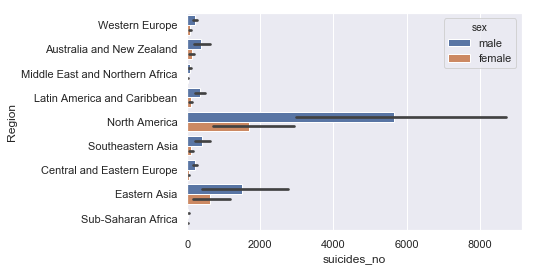

In [26]:
df.sort_values(by=["Region","Country"])

sns.barplot(x="suicides_no", 
            y="Region", 
            hue="sex", 
            data=df)


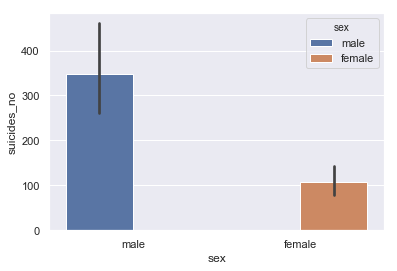

In [27]:
sns.barplot(x="sex", 
            y="suicides_no", 
            hue="sex", 
            data=df)